In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('archive/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

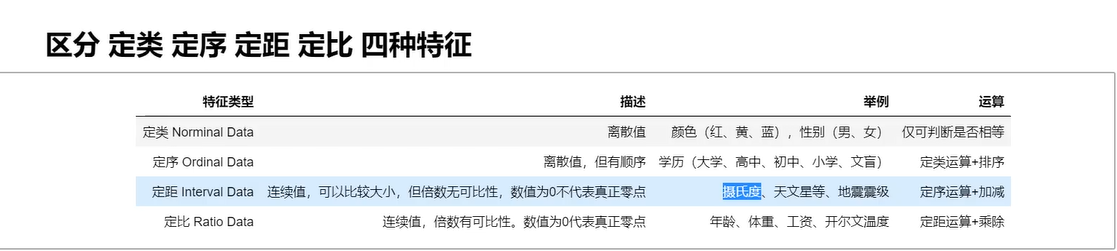

#### 将定类特征由整数编码转为实际对应的字符串

In [12]:
import warnings
warnings.filterwarnings('ignore')


df['sex'][df.sex == 0] = 'female'
df['sex'][df.sex == 1] = 'male'

df['cp'][df.cp == 0] = '普通'
df['cp'][df.cp == 1] = '一般'
df['cp'][df.cp == 2] = '严重'
df['cp'][df.cp == 3] = '加重'

df['fbs'][df.fbs == 0] = 'lower than 120'
df['fbs'][df.fbs == 1] = 'higher than 120'

df['restecg'][df.restecg == 0] = 'normal'
df['restecg'][df.restecg == 1] = 'average'
df['restecg'][df.restecg == 2] = 'dangerous'

df['exang'][df.exang == 0] = 'No'
df['exang'][df.exang == 1] = 'True'


df['slope'][df.slope == 0] = 'upslope'
df['slope'][df.slope == 1] = 'slope'
df['slope'][df.slope == 2] = 'downslope'

df['thalach'][df.thalach == 0] = 'unknown'
df['thalach'][df.thalach == 1] = 'normal'
df['thalach'][df.thalach == 2] = 'fixed_defect'
df['thalach'][df.thalach == 30] = 'reversable_defect'

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,加重,145,233,higher than 120,normal,150,No,2.3,upslope,0,1,1
1,37,male,严重,130,250,lower than 120,average,187,No,3.5,upslope,0,2,1
2,41,female,一般,130,204,lower than 120,normal,172,No,1.4,downslope,0,2,1
3,56,male,一般,120,236,lower than 120,average,178,No,0.8,downslope,0,2,1
4,57,female,普通,120,354,lower than 120,average,163,True,0.6,downslope,0,2,1


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 33.3+ KB


In [17]:
df.info

<bound method DataFrame.info of      age     sex  cp  trestbps  chol              fbs  restecg  thalach exang  \
0     63    male  加重       145   233  higher than 120   normal      150    No   
1     37    male  严重       130   250   lower than 120  average      187    No   
2     41  female  一般       130   204   lower than 120   normal      172    No   
3     56    male  一般       120   236   lower than 120  average      178    No   
4     57  female  普通       120   354   lower than 120  average      163  True   
..   ...     ...  ..       ...   ...              ...      ...      ...   ...   
298   57  female  普通       140   241   lower than 120  average      123  True   
299   45    male  加重       110   264   lower than 120  average      132    No   
300   68    male  普通       144   193  higher than 120  average      141    No   
301   57    male  普通       130   131   lower than 120  average      115  True   
302   57  female  一般       130   236   lower than 120   normal      174    No

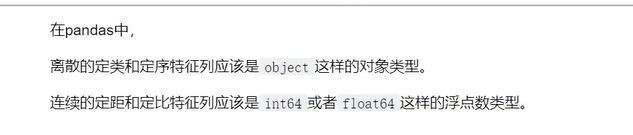

#### 将离散的定类和定序特征列转化为One-hot独特编码

In [18]:
df = pd.get_dummies(df)
df

,age,trestbps,chol,thalach,oldpeak,ca,thal,target,sex_female,sex_male,...,fbs_higher than 120,fbs_lower than 120,restecg_average,restecg_dangerous,restecg_normal,exang_No,exang_True,slope_downslope,slope_slope,slope_upslope
0,63,145,233,150,2.3,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1
1,37,130,250,187,3.5,0,2,1,0,1,...,0,1,1,0,0,1,0,0,0,1
2,41,130,204,172,1.4,0,2,1,1,0,...,0,1,0,0,1,1,0,1,0,0
3,56,120,236,178,0.8,0,2,1,0,1,...,0,1,1,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,2,1,1,0,...,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,3,0,1,0,...,0,1,1,0,0,0,1,0,1,0
299,45,110,264,132,1.2,0,3,0,0,1,...,0,1,1,0,0,1,0,0,1,0
300,68,144,193,141,3.4,2,3,0,0,1,...,1,0,1,0,0,1,0,0,1,0
301,57,130,131,115,1.2,1,3,0,0,1,...,0,1,1,0,0,0,1,0,1,0


In [19]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'target',
       'sex_female', 'sex_male', 'cp_一般', 'cp_严重', 'cp_加重', 'cp_普通',
       'fbs_higher than 120', 'fbs_lower than 120', 'restecg_average',
       'restecg_dangerous', 'restecg_normal', 'exang_No', 'exang_True',
       'slope_downslope', 'slope_slope', 'slope_upslope'],
      dtype='object')

In [20]:
df.to_csv('processing_file.csv',index = False)